In [1]:
import sys
sys.path.append('../')
from _imports import *

In [3]:
train_X = pd.read_csv('../data/preprocess/train_X.csv').to_numpy()
train_y = pd.read_csv('../data/preprocess/train_y.csv').iloc[:, 0].to_numpy()

In [4]:
def cross_val(X, y, model, test_frac, count, random_state):
  N = len(y)
  N_test = int(test_frac*N)
  N_train = N - N_test
  rnd = np.random.RandomState(random_state)
  costs = np.zeros(count)
  for i in range(count):
    inds = rnd.permutation(N)
    train_inds = inds[:N_train]
    test_inds = inds[N_train:]
    X_train = X[train_inds]
    X_test = X[test_inds]
    y_train = y[train_inds]
    y_test = y[test_inds]
    
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    
    cost = math.sqrt(np.mean((y_test - y_test_pred)**2))
    print(i, cost)
    costs[i] = cost
  return costs

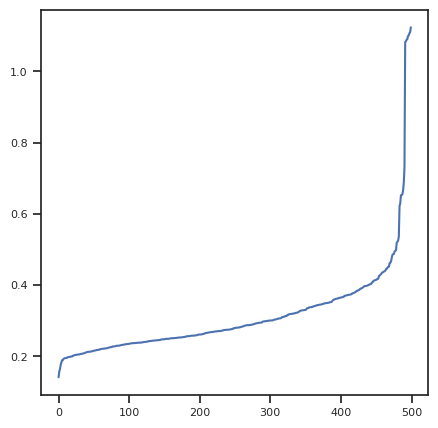

In [43]:
costs = cross_val(
  train_X,
  train_y,
  ElasticNet(alpha=0.01, l1_ratio=0.1, random_state=0),
  0.025,
  500,
  0
)

sns.lineplot(x=range(len(costs)), y=np.sort(costs));

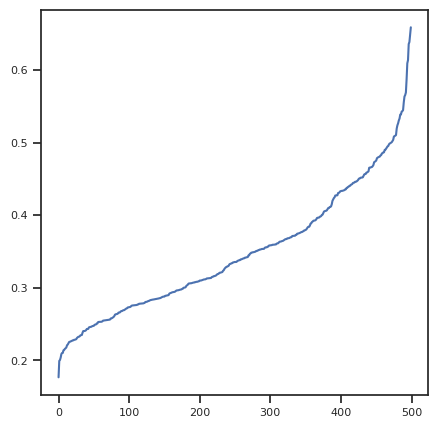

In [45]:
costs = cross_val(
  train_X,
  train_y,
  RandomForestRegressor(
    n_estimators=1000,
    criterion='squared_error',
    max_depth=16,
    max_features='sqrt',
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    max_samples=0.9,
    ccp_alpha=0.0,
    random_state=1,
  ),
  0.025,
  500,
  0
)

sns.lineplot(x=range(len(costs)), y=np.sort(costs));

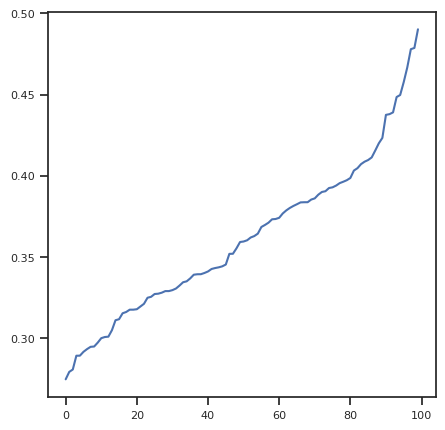

In [7]:
costs = cross_val(
  train_X,
  train_y,
  RandomForestRegressor(
    n_estimators=1000,
    criterion='squared_error',
    max_depth=16,
    max_features='sqrt',
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    max_samples=0.9,
    ccp_alpha=0.0,
    random_state=1,
  ),
  0.1,
  100,
  0
)

sns.lineplot(x=range(len(costs)), y=np.sort(costs));